<a href="https://colab.research.google.com/github/Vkrisn/MLE/blob/main/V_Module2_Assignment_HotelBooking_0330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to End Classfication Problem 
####1.Define the problem statement

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?
####2.Import the necessary libraries 
####3.Import the data : Local or Github
####4.Understand the Data:shape,info,types,missing values
####change features/columns to lower case,duplicates,corr
####5.Exploratory Data Analysis-Categorical and Numerical Values
####6.Vectorize the Data
####7.Feature Engineering
####8.Algorithm Harness
####9.Calculate f1 score
####10.Hyperparameter Tuning


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Vkrisn/MLE/049d1bee72e1738e5557e45f2fc5511aceb765ab/Hotel%20Reservations.csv")
print(len(df))
df.head()

36275


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Simple Investigation of Data

In [3]:
df.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [4]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
# Encoding the Target with 0's and 1's
df.booking_status = (df.booking_status == 'canceled').astype(int)

In [7]:
df['booking_status'].nunique()

2

In [8]:
df['booking_status'].sample(25)

34200    1
4246     0
29324    0
28015    1
3126     0
17009    1
13320    1
21771    0
23909    0
16189    0
1830     0
16725    1
15835    0
23930    1
23704    0
21878    0
30277    0
23656    1
26174    0
30110    0
19190    0
23822    1
28551    0
15953    0
12198    1
Name: booking_status, dtype: int64

In [9]:
df.drop(['booking_id'], axis = 'columns', inplace = True)

In [10]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.booking_status.values
y_val = df_val.booking_status.values

del df_train['booking_status']
del df_val['booking_status']

# Quality Investigation of Data

In [11]:
df_train_full.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df_train_full.booking_status.value_counts()

0    19483
1     9537
Name: booking_status, dtype: int64

In [13]:

# Duplicates in the Columns?
df.duplicated()
df.duplicated().sum()

# Duplicated Rows?
df[df.duplicated()]

#df.shape

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
20,2,0,2,2,meal_plan_1,0,room_type_1,99,2017,10,30,online,0,0,0,65.00,0,1
154,2,0,0,1,meal_plan_2,0,room_type_1,55,2018,4,6,offline,0,0,0,104.00,0,0
272,2,0,1,2,meal_plan_2,0,room_type_1,161,2018,3,25,online,0,0,0,130.00,0,1
301,1,0,0,2,meal_plan_1,0,room_type_1,188,2018,6,15,online,0,0,0,130.00,0,1
319,2,0,0,2,meal_plan_2,0,room_type_1,320,2018,8,18,online,0,0,0,115.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,1,0,2,4,meal_plan_1,0,room_type_1,245,2018,7,6,offline,0,0,0,110.00,0,1
36263,1,0,2,1,meal_plan_1,0,room_type_1,116,2018,2,28,online,0,0,0,1.00,0,0
36267,2,0,1,0,not_selected,0,room_type_1,49,2018,7,11,online,0,0,0,93.15,0,1
36268,1,0,0,3,meal_plan_1,0,room_type_1,166,2018,11,1,offline,0,0,0,110.00,0,1


Text(158.22222222222223, 0.5, 'Sample Number')

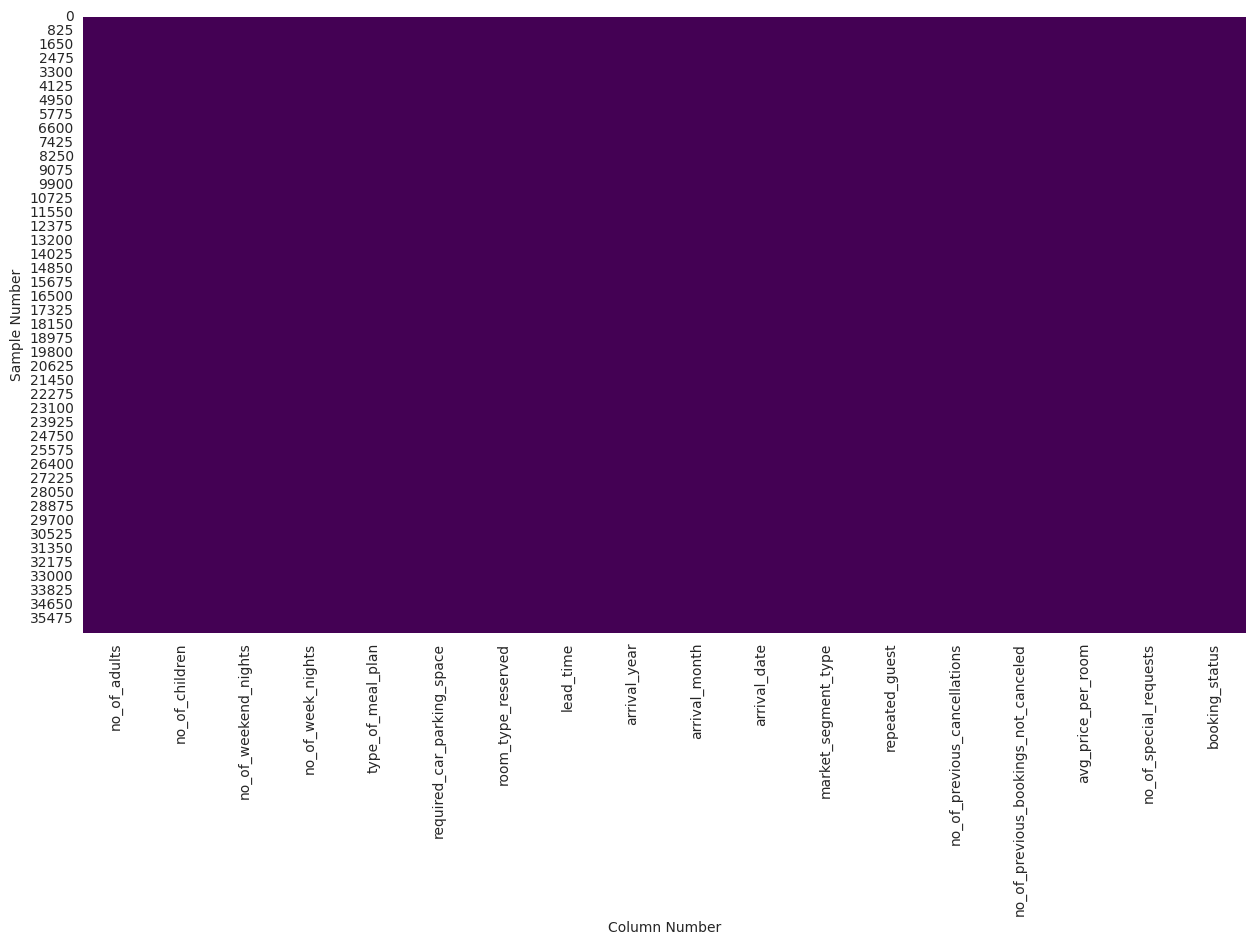

In [14]:
# MISSING VALUES
df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])  

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

# b) Missing Values per Sample (Big Holes)

plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

# Exploratory Data Analysis

In [15]:
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df_train.select_dtypes(exclude=numerics)
numDF = df_train.select_dtypes(include=numerics)
categorical=catDF.columns.values.tolist()
print(categorical)
numerical=numDF.columns.values.tolist()
print(numerical)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [16]:
df_train_full[categorical].nunique()

type_of_meal_plan      4
room_type_reserved     7
market_segment_type    5
dtype: int64

In [17]:
df_train_full[numerical].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,1.844487,0.105892,0.813267,2.207167,0.031220,85.439524,2017.820365,7.429256,15.595176,0.025534,0.024569,0.152068,103.495405,0.618401
std,0.519152,0.406603,0.872701,1.411757,0.173914,86.212492,0.383890,3.070082,8.735686,0.157743,0.383122,1.742691,35.172400,0.786183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.375000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [18]:
df_train_full.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.026137,0.106961,0.102638,0.010647,0.097509,0.080110,0.021929,0.027028,-0.190942,-0.044201,-0.118409,0.300888,0.189196,0.091589
no_of_children,-0.026137,1.000000,0.032323,0.025536,0.028294,-0.046589,0.045924,-0.000721,0.022402,-0.035711,-0.016481,-0.020829,0.336621,0.119945,0.036285
no_of_weekend_nights,0.106961,0.032323,1.000000,0.181375,-0.029929,0.050380,0.055910,-0.010776,0.027050,-0.068496,-0.021320,-0.024470,0.004604,0.057113,0.062028
no_of_week_nights,0.102638,0.025536,0.181375,1.000000,-0.047677,0.150304,0.032044,0.038182,-0.009308,-0.100352,-0.032602,-0.048186,0.019615,0.046577,0.091316
required_car_parking_space,0.010647,0.028294,-0.029929,-0.047677,1.000000,-0.068465,0.012774,-0.014064,-0.002546,0.125444,0.030380,0.070406,0.061545,0.087387,-0.088054
lead_time,0.097509,-0.046589,0.050380,0.150304,-0.068465,1.000000,0.139770,0.136640,0.006281,-0.136120,-0.048145,-0.078284,-0.064000,-0.101971,0.438241
arrival_year,0.080110,0.045924,0.055910,0.032044,0.012774,0.139770,1.000000,-0.339619,0.020014,-0.015872,0.005173,0.025844,0.178344,0.055231,0.180817
arrival_month,0.021929,-0.000721,-0.010776,0.038182,-0.014064,0.136640,-0.339619,1.000000,-0.043602,-0.003136,-0.043714,-0.009882,0.054757,0.112156,-0.010677
arrival_date,0.027028,0.022402,0.027050,-0.009308,-0.002546,0.006281,0.020014,-0.043602,1.000000,-0.014155,-0.012946,-0.004205,0.021178,0.018716,0.010983
repeated_guest,-0.190942,-0.035711,-0.068496,-0.100352,0.125444,-0.136120,-0.015872,-0.003136,-0.014155,1.000000,0.396173,0.539072,-0.174454,-0.013125,-0.107673


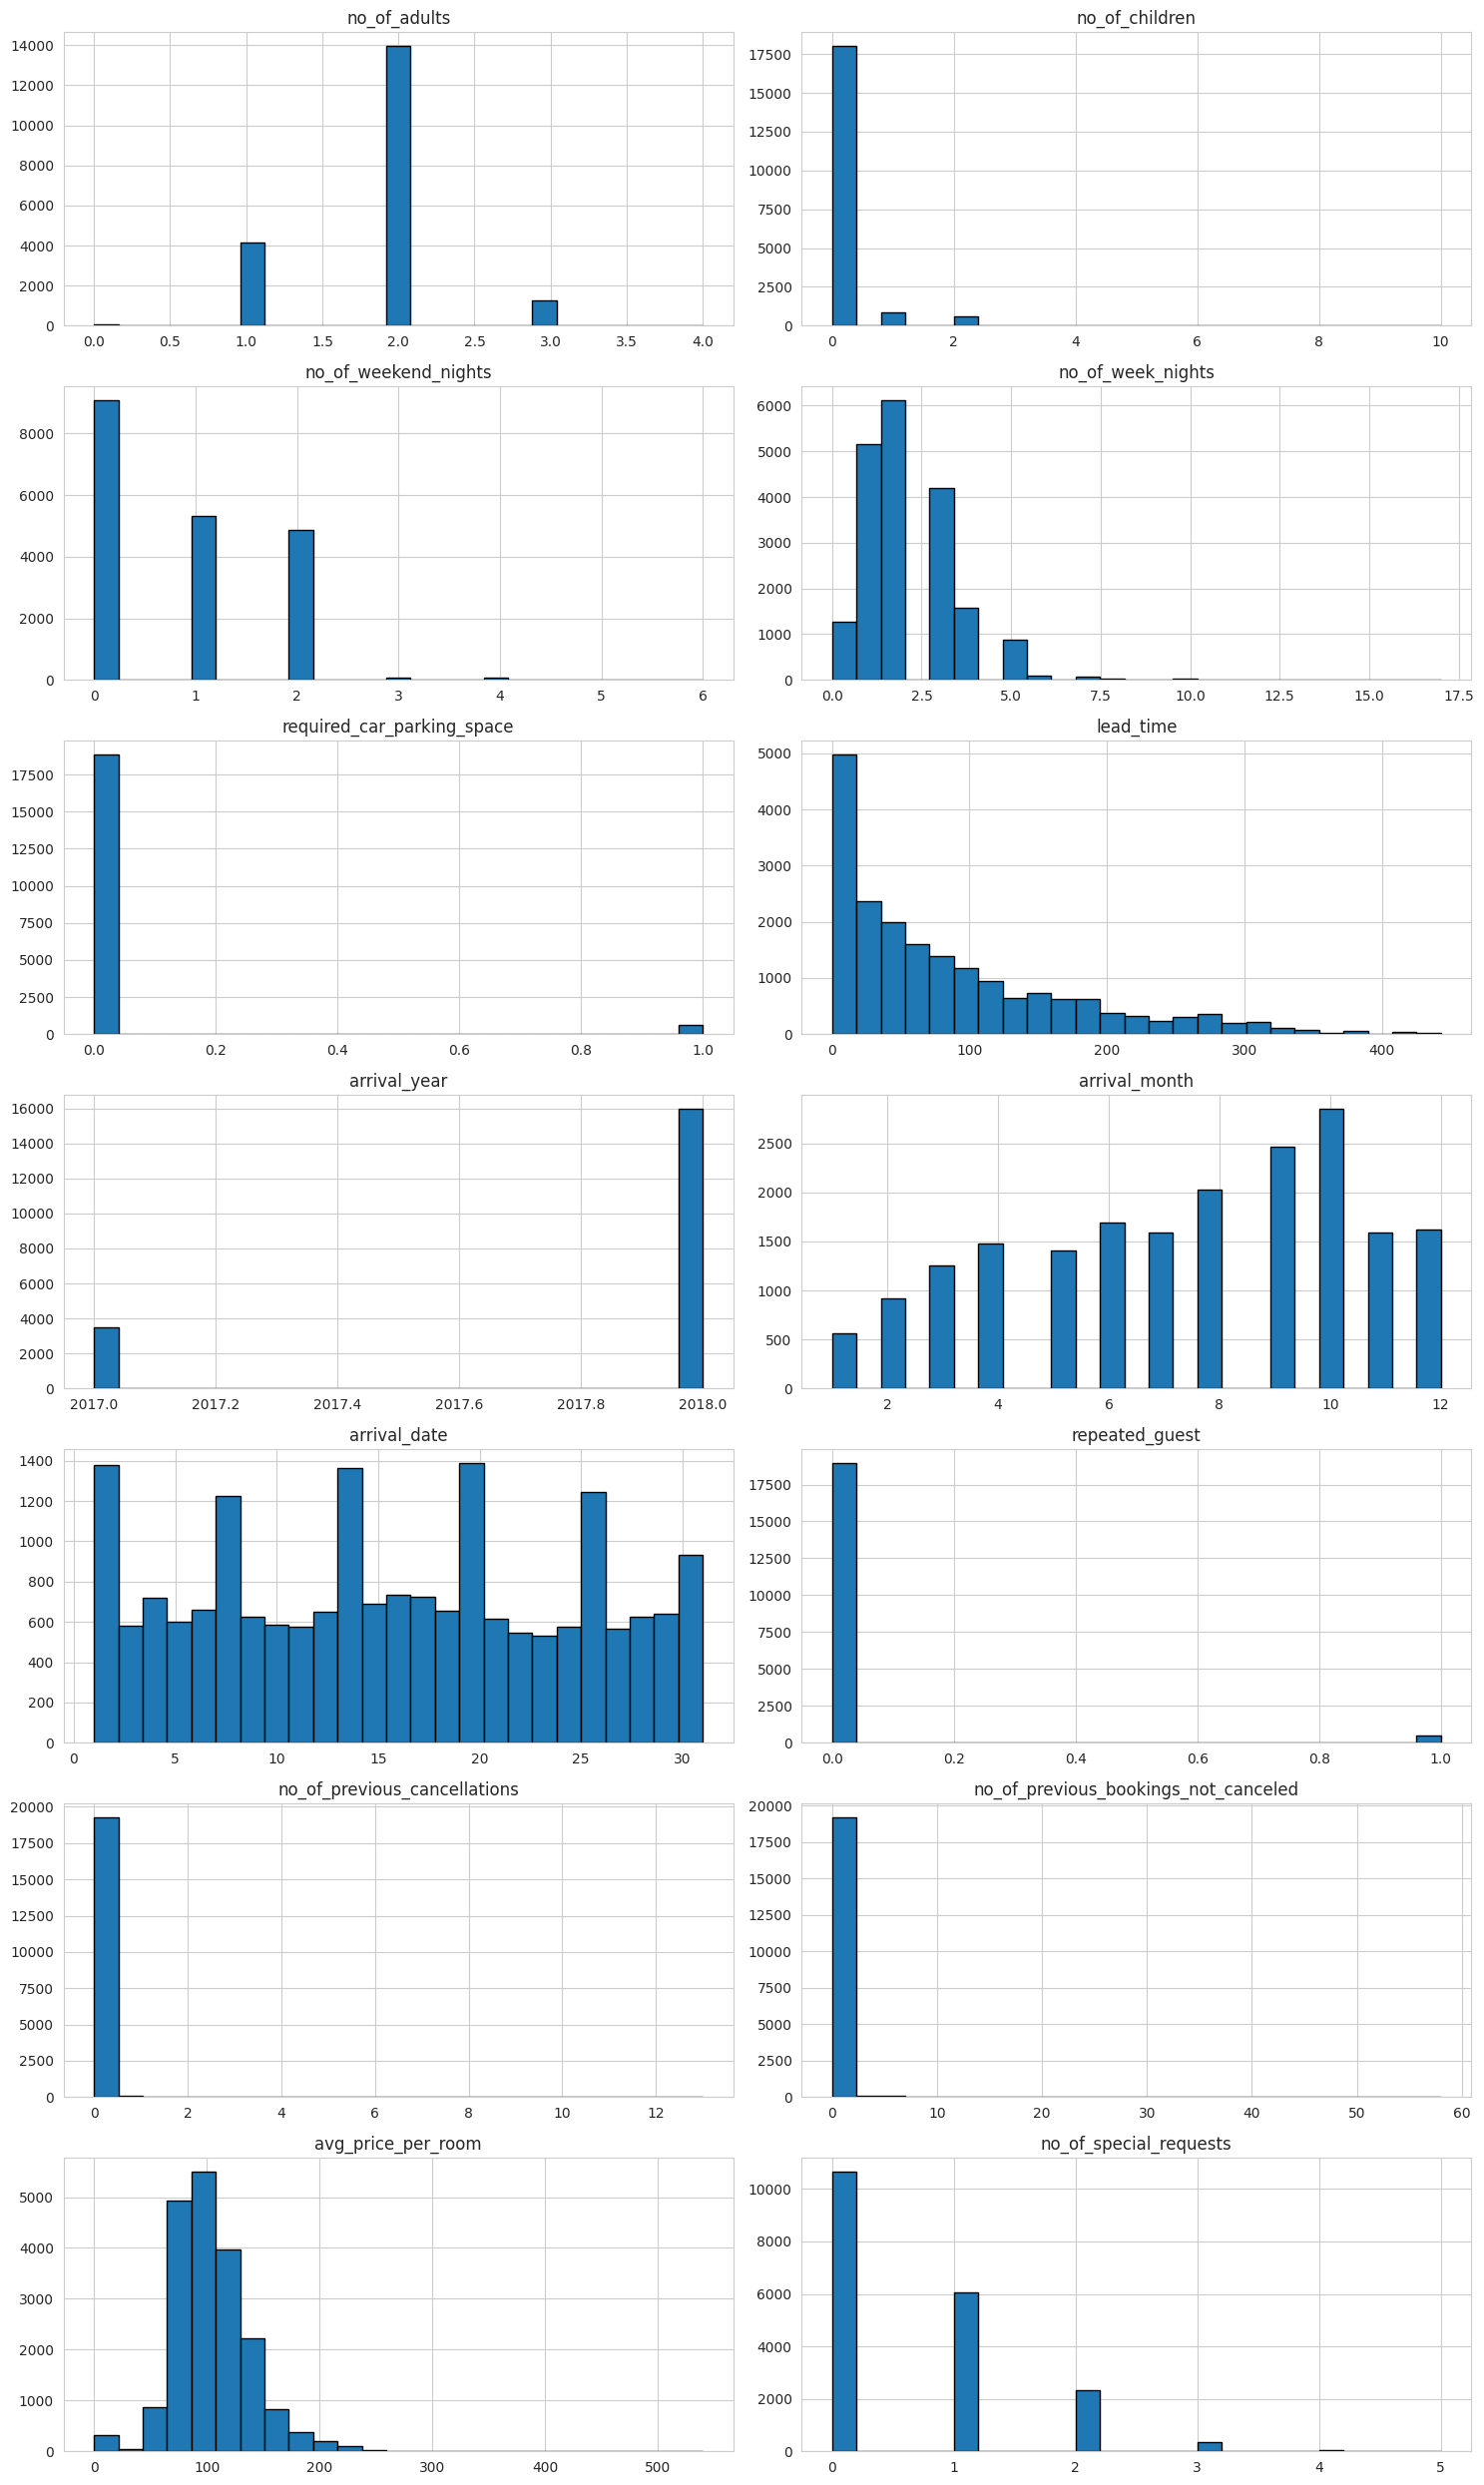

In [19]:
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2),
edgecolor="black")
plt.tight_layout();

# Feature Importance

In [20]:
from IPython.display import display
global_mean = df_train_full.booking_status.mean()
global_mean

0.3286354238456237

In [21]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).booking_status.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
type_of_meal_plan,,,
meal_plan_1,0.312264,-0.016371,0.950184
meal_plan_2,0.459459,0.130824,1.398083
meal_plan_3,0.200000,-0.128635,0.608577
not_selected,0.332603,0.003967,1.012072


,mean,diff,risk
room_type_reserved,,,
room_type_1,0.323350,-0.005285,0.983918
room_type_2,0.333925,0.005290,1.016097
room_type_3,0.333333,0.004698,1.014295
room_type_4,0.341352,0.012717,1.038696
room_type_5,0.275701,-0.052934,0.838926
room_type_6,0.425641,0.097006,1.295177
room_type_7,0.253846,-0.074789,0.772425


,mean,diff,risk
market_segment_type,,,
aviation,0.290000,-0.038635,0.882437
complementary,0.000000,-0.328635,0.000000
corporate,0.114127,-0.214508,0.347276
offline,0.297832,-0.030804,0.906268
online,0.366828,0.038193,1.116216


In [22]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.booking_status)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
market_segment_type,0.013890
type_of_meal_plan,0.003861
room_type_reserved,0.000769


,MI
market_segment_type,0.013890
type_of_meal_plan,0.003861
room_type_reserved,0.000769


# One Hot Encoding

In [23]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')




In [24]:
dict_test = df_test.to_dict(orient='records')


In [25]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(train_dict)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [26]:
train_dict[0]

{'type_of_meal_plan': 'meal_plan_1',
 'room_type_reserved': 'room_type_4',
 'market_segment_type': 'online',
 'no_of_adults': 3,
 'no_of_children': 0,
 'no_of_weekend_nights': 0,
 'no_of_week_nights': 3,
 'required_car_parking_space': 0,
 'lead_time': 38,
 'arrival_year': 2018,
 'arrival_month': 5,
 'arrival_date': 10,
 'repeated_guest': 0,
 'no_of_previous_cancellations': 0,
 'no_of_previous_bookings_not_canceled': 0,
 'avg_price_per_room': 159.3,
 'no_of_special_requests': 0}

In [27]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [28]:
X_train = dv.transform(train_dict)
X_train.shape

(19443, 30)

In [29]:
dv.feature_names_

['arrival_date',
 'arrival_month',
 'arrival_year',
 'avg_price_per_room',
 'lead_time',
 'market_segment_type=aviation',
 'market_segment_type=complementary',
 'market_segment_type=corporate',
 'market_segment_type=offline',
 'market_segment_type=online',
 'no_of_adults',
 'no_of_children',
 'no_of_previous_bookings_not_canceled',
 'no_of_previous_cancellations',
 'no_of_special_requests',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'repeated_guest',
 'required_car_parking_space',
 'room_type_reserved=room_type_1',
 'room_type_reserved=room_type_2',
 'room_type_reserved=room_type_3',
 'room_type_reserved=room_type_4',
 'room_type_reserved=room_type_5',
 'room_type_reserved=room_type_6',
 'room_type_reserved=room_type_7',
 'type_of_meal_plan=meal_plan_1',
 'type_of_meal_plan=meal_plan_2',
 'type_of_meal_plan=meal_plan_3',
 'type_of_meal_plan=not_selected']

# Algorithm Harness


LR: 0.802859 (0.006795)
Score for each of the 10 K-fold tests:  [0.79845758 0.80514139 0.81182519 0.80658436 0.78960905 0.81018519
 0.80144033 0.80349794 0.80812757 0.79372428]
LogisticRegression(solver='liblinear')
	Training time: 0.179s
	Prediction time: 2.415s

KNN: 0.794218 (0.007448)
Score for each of the 10 K-fold tests:  [0.79691517 0.79125964 0.81028278 0.79526749 0.78240741 0.7962963
 0.78960905 0.79423868 0.80041152 0.78549383]
KNeighborsClassifier()
	Training time: 0.002s
	Prediction time: 3.487s

CART: 0.853829 (0.007083)
Score for each of the 10 K-fold tests:  [0.85552699 0.84267352 0.86169666 0.84207819 0.85493827 0.86213992
 0.86265432 0.84876543 0.85442387 0.85339506]
DecisionTreeClassifier()
	Training time: 0.081s
	Prediction time: 0.801s



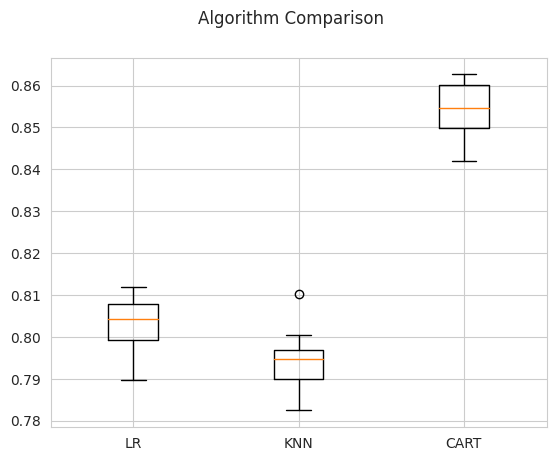

In [30]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [32]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [33]:
y_pred = model.predict_proba(X_val)

In [34]:
y_pred

array([[0.29145988, 0.70854012],
       [0.54053477, 0.45946523],
       [0.60281762, 0.39718238],
       ...,
       [0.36982492, 0.63017508],
       [0.99425378, 0.00574622],
       [0.23575275, 0.76424725]])

In [35]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.70854012, 0.45946523, 0.39718238, ..., 0.63017508, 0.00574622,
       0.76424725])

In [36]:
booking_status = y_pred > 0.5

In [37]:
(y_val == booking_status).mean()

0.7983710974209043

In [38]:
model.intercept_[0]

-0.00022499599555172138

In [39]:
dict(zip(dv.feature_names_, model.coef_[0].round(7)))

{'arrival_date': 9.23e-05,
 'arrival_month': -0.0583672,
 'arrival_year': -0.0018101,
 'avg_price_per_room': 0.0187283,
 'lead_time': 0.015889,
 'market_segment_type=aviation': 0.0233918,
 'market_segment_type=complementary': -0.0120778,
 'market_segment_type=corporate': -0.0558925,
 'market_segment_type=offline': -0.8031687,
 'market_segment_type=online': 0.8475223,
 'no_of_adults': 0.0338727,
 'no_of_children': -0.0645321,
 'no_of_previous_bookings_not_canceled': -0.1673509,
 'no_of_previous_cancellations': -0.0214622,
 'no_of_special_requests': -1.4183033,
 'no_of_week_nights': 0.0555733,
 'no_of_weekend_nights': 0.1095512,
 'repeated_guest': -0.056588,
 'required_car_parking_space': -0.2168488,
 'room_type_reserved=room_type_1': 0.1441578,
 'room_type_reserved=room_type_2': -0.0168194,
 'room_type_reserved=room_type_3': -0.00072,
 'room_type_reserved=room_type_4': 0.0049491,
 'room_type_reserved=room_type_5': -0.0120849,
 'room_type_reserved=room_type_6': -0.081542,
 'room_type_res

# Test the Model -Decision Tree and Hyper Parameter Tuning

In [44]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [45]:
# This will give you the list of Hyperparameters of your model

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

['arrival_date',
 'arrival_month',
 'arrival_year',
 'avg_price_per_room',
 'lead_time',
 'market_segment_type=aviation',
 'market_segment_type=complementary',
 'market_segment_type=corporate',
 'market_segment_type=offline',
 'market_segment_type=online',
 'no_of_adults',
 'no_of_children',
 'no_of_previous_bookings_not_canceled',
 'no_of_previous_cancellations',
 'no_of_special_requests',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'repeated_guest',
 'required_car_parking_space',
 'room_type_reserved=room_type_1',
 'room_type_reserved=room_type_2',
 'room_type_reserved=room_type_3',
 'room_type_reserved=room_type_4',
 'room_type_reserved=room_type_5',
 'room_type_reserved=room_type_6',
 'room_type_reserved=room_type_7',
 'type_of_meal_plan=meal_plan_1',
 'type_of_meal_plan=meal_plan_2',
 'type_of_meal_plan=meal_plan_3',
 'type_of_meal_plan=not_selected']

In [47]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [48]:
# interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.086 arrival_date
0.070 arrival_month
0.014 arrival_year
0.164 avg_price_per_room
0.347 lead_time
0.000 market_segment_type=aviation
0.000 market_segment_type=complementary
0.001 market_segment_type=corporate
0.005 market_segment_type=offline
0.096 market_segment_type=online
0.029 no_of_adults
0.004 no_of_children
0.000 no_of_previous_bookings_not_canceled
0.000 no_of_previous_cancellations
0.068 no_of_special_requests
0.045 no_of_week_nights
0.038 no_of_weekend_nights
0.000 repeated_guest
0.006 required_car_parking_space
0.004 room_type_reserved=room_type_1
0.000 room_type_reserved=room_type_2
0.000 room_type_reserved=room_type_3
0.006 room_type_reserved=room_type_4
0.001 room_type_reserved=room_type_5
0.000 room_type_reserved=room_type_6
0.000 room_type_reserved=room_type_7
0.006 type_of_meal_plan=meal_plan_1
0.004 type_of_meal_plan=meal_plan_2
0.000 type_of_meal_plan=meal_plan_3
0.004 type_of_meal_plan=not_selected


In [49]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [50]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[200]].to_dict('records')[0]

{'no_of_adults': 2,
 'no_of_children': 0,
 'no_of_weekend_nights': 0,
 'no_of_week_nights': 2,
 'type_of_meal_plan': 'not_selected',
 'required_car_parking_space': 0,
 'room_type_reserved': 'room_type_1',
 'lead_time': 64,
 'arrival_year': 2018,
 'arrival_month': 4,
 'arrival_date': 13,
 'market_segment_type': 'online',
 'repeated_guest': 0,
 'no_of_previous_cancellations': 0,
 'no_of_previous_bookings_not_canceled': 0,
 'avg_price_per_room': 94.5,
 'no_of_special_requests': 1,
 'booking_status': 0}

In [51]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[200]].to_dict('records')[0]
actual = y_train[[200]]

In [52]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [53]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [54]:
model_prediction(item,dv,dt)

0

# Precision and Recall

In [55]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [56]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [57]:
y_pred = model.predict_proba(X_val)[:, 1]
booking_status = y_pred >= 0.8
(booking_status == y_val).mean()

0.8609167797849013

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

0.8595593609689882

In [59]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [60]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.333
0.05 0.852
0.10 0.854
0.15 0.856
0.20 0.857
0.25 0.859
0.30 0.859
0.35 0.860
0.40 0.860
0.45 0.860
0.50 0.860
0.55 0.861
0.60 0.862
0.65 0.862
0.70 0.861
0.75 0.861
0.80 0.861
0.85 0.861
0.90 0.860
0.95 0.860
1.00 0.860


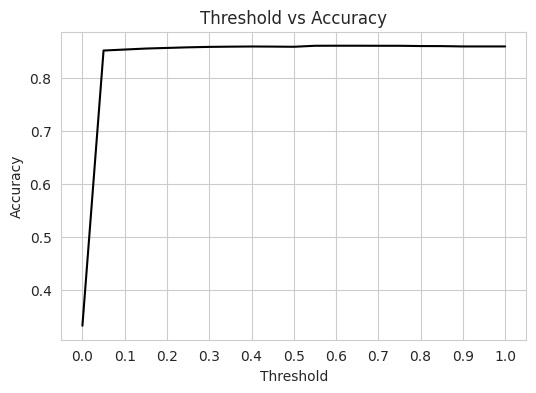

In [61]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [62]:
true_positive = ((y_pred >= 0.8) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.8) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.8) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.8) & (y_val == 0)).sum()

In [63]:
true_positive = ((y_pred >= 0.8) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.8) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.8) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.8) & (y_val == 0)).sum()

In [64]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.7918367346938775, 0.7903478533375118)

In [65]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [66]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,3191,6386,0,0
10,0.1,2567,771,624,5615
20,0.2,2563,738,628,5648
30,0.3,2558,714,633,5672
40,0.4,2555,704,636,5682
50,0.5,2545,699,646,5687
60,0.6,2535,665,656,5721
70,0.7,2527,663,664,5723
80,0.8,2522,663,669,5723
90,0.9,2513,661,678,5725


In [67]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [68]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,3191,6386,0,0,1.000000,1.000000
10,0.1,2567,771,624,5615,0.804450,0.120733
20,0.2,2563,738,628,5648,0.803196,0.115565
30,0.3,2558,714,633,5672,0.801630,0.111807
40,0.4,2555,704,636,5682,0.800689,0.110241
50,0.5,2545,699,646,5687,0.797556,0.109458
60,0.6,2535,665,656,5721,0.794422,0.104134
70,0.7,2527,663,664,5723,0.791915,0.103821
80,0.8,2522,663,669,5723,0.790348,0.103821
90,0.9,2513,661,678,5725,0.787527,0.103508


In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8477782309959412

In [71]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [72]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


In [73]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.booking_status.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.booking_status.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [74]:
np.array(aucs).round(3)


array([0.865, 0.857, 0.857, 0.855, 0.866, 0.864, 0.854, 0.858, 0.863,
       0.869])

In [75]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.861 ± 0.005
